# 2016 US General Election

---

---

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from statsmodels.stats.weightstats import DescrStatsW

import us

import sys

import os
path = os.getcwd()
path = path[:path.find('us_election2020')] + 'us_election2020'

sys.path.append(path + '\\src\\data')
import make_dataset

In [2]:
polls2016 = pd.read_csv(path + '\\data\\raw\\president_polls2016.csv', 
                        parse_dates=['startdate', 'enddate', 'createddate', 
                                     'timestamp', 'forecastdate'], index_col=['startdate'])

In [3]:
polls2016['state'] = polls2016['state'].replace({'U.S.':'National', 
                            'Maine CD-1':'Maine', 'Maine CD-2':'Maine', 
                            'Nebraska CD-1':'Nebraska', 'Nebraska CD-2':'Nebraska', 'Nebraska CD-3':'Nebraska'})

In [4]:
polls2016 = polls2016.drop(['adjpoll_clinton', 'adjpoll_trump', 'adjpoll_johnson', 'adjpoll_mcmullin', 
                            'matchup', 'timestamp', 'cycle', 'branch', 'forecastdate', 'poll_wt', 
                            'multiversions'], axis='columns')

In [5]:
polls2016 = polls2016.reset_index().rename({'startdate':'start_date', 'enddate':'end_date', 'createddate':'created_date', 
                  'samplesize':'sample_size', 
                  'rawpoll_clinton':'Clinton', 'rawpoll_trump':'Trump', 
                  'rawpoll_johnson':'Johnson', 'rawpoll_mcmullin':'McMullin'}, axis='columns')

In [6]:
population_weight = {'a':0.7, 'v':0.8, 'rv':0.9, 'lv':1.}
polls2016['population_weight'] = polls2016['population'].replace(population_weight)

In [7]:
polls2016.columns

Index(['start_date', 'type', 'state', 'end_date', 'pollster', 'grade',
       'sample_size', 'population', 'Clinton', 'Trump', 'Johnson', 'McMullin',
       'url', 'poll_id', 'question_id', 'created_date', 'population_weight'],
      dtype='object')

In [8]:
polls2016['diff'] = polls2016['Clinton'] - polls2016['Trump']
polls2016['weight'] = polls2016['sample_size']*polls2016['population_weight']

In [9]:
polls2016['pollster_id'] = pd.util.hash_array(polls2016['pollster'])

In [10]:
polls2016['grade'] = polls2016['grade'].str.replace('+','').str.replace('-','')
#polls2016 = polls2016[polls2016['grade']<='C']

In [11]:
dropp_pollsters = ['Google Consumer Surveys', 'SurveyMonkey', 'Rasmussen Reports/Pulse Opinion Research', 
                   'SurveyUSA']
polls2016 = polls2016[~polls2016['pollster'].isin(dropp_pollsters)]
#polls2016 = polls2016[(polls2016['sample_size']>750)]

In [12]:
polls2016[(polls2016['state']=='National')].pollster.unique()

array(['ABC News/Washington Post', 'Ipsos', 'YouGov', 'Gravis Marketing',
       'Fox News/Anderson Robbins Research/Shaw & Company Research',
       'CBS News/New York Times', 'NBC News/Wall Street Journal',
       'IBD/TIPP', 'Selzer & Company', 'Angus Reid Global',
       'Monmouth University', 'Marist College',
       'The Times-Picayune/Lucid', 'USC Dornsife/LA Times',
       'RKM Research and Communications, Inc.', 'CVOTER International',
       'Morning Consult', 'Pew Research Center', 'Insights West',
       'RAND (American Life Panel)', 'GfK Group', 'Suffolk University',
       'Quinnipiac University', 'Public Policy Polling',
       'CNN/Opinion Research Corp.',
       'Greenberg Quinlan Rosner (Democracy Corps)',
       'Saint Leo University',
       'Princeton Survey Research Associates International',
       'American Research Group', 'Centre College',
       'Public Religion Research Institute',
       'George Washington University (Battleground)', 'Edison Research',
    

In [13]:
polls2016 = polls2016.sort_values(['start_date', 'end_date']).set_index('start_date')
polls2016

,type,state,end_date,pollster,grade,sample_size,population,Clinton,Trump,Johnson,McMullin,url,poll_id,question_id,created_date,population_weight,diff,weight,pollster_id
start_date,,,,,,,,,,,,,,,,,,,
2015-11-06,polls-plus,New Hampshire,2015-11-16,Morning Consult,NaN,530.0,rv,45.00,38.00,NaN,NaN,http://morningconsult.com/wp-content/uploads/2...,35393,47315,2015-12-07,0.9,7.00,477.0,9104766023743465720
2015-11-06,now-cast,New Hampshire,2015-11-16,Morning Consult,NaN,530.0,rv,45.00,38.00,NaN,NaN,http://morningconsult.com/wp-content/uploads/2...,35393,47315,2015-12-07,0.9,7.00,477.0,9104766023743465720
2015-11-06,polls-only,New Hampshire,2015-11-16,Morning Consult,NaN,530.0,rv,45.00,38.00,NaN,NaN,http://morningconsult.com/wp-content/uploads/2...,35393,47315,2015-12-07,0.9,7.00,477.0,9104766023743465720
2015-11-07,polls-plus,South Carolina,2015-11-08,Public Policy Polling,B,1290.0,v,42.00,47.00,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,35362,47298,2015-11-19,0.8,-5.00,1032.0,10750933767423040508
2015-11-07,now-cast,South Carolina,2015-11-08,Public Policy Polling,B,1290.0,v,42.00,47.00,NaN,NaN,http://www.publicpolicypolling.com/pdf/2015/PP...,35362,47298,2015-11-19,0.8,-5.00,1032.0,10750933767423040508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-06,polls-only,Georgia,2016-11-06,Landmark Communications,B,1200.0,lv,46.00,49.00,3.00,NaN,http://landmarkcommunications.net/landmarkrose...,48525,76068,2016-11-07,1.0,-3.00,1200.0,13765529832263516804
2016-11-06,polls-only,Georgia,2016-11-06,Trafalgar Group,C,1250.0,lv,45.11,51.58,1.89,NaN,https://drive.google.com/file/d/0B4lhKxf9pMitO...,48770,76353,2016-11-07,1.0,-6.47,1250.0,16404250746045064108
2016-11-06,polls-only,Michigan,2016-11-06,Trafalgar Group,C,1200.0,lv,46.82,48.52,2.89,NaN,https://drive.google.com/file/d/0B4lhKxf9pMitN...,48686,76258,2016-11-07,1.0,-1.70,1200.0,16404250746045064108


In [14]:
polls2016 = polls2016[polls2016['type']=='polls-only']

---

In [15]:
def get_state_statsSmooth2016_atK(df, candidates, state, k):
    """
    Get candidate's average and standard deviation (weighted) in state
    INPUT:
    - df: dataframe with polls statistics
    - candidates: list of candidates to return stats
    - state: US state
    - k: last k polls to analyse
    
    OUTPUT:
    - df with candidates avg, diff avd, and std
    """
    
    candidates = candidates + ['diff']
    cols_avg = [c + '_avg' for c in candidates]
    cols_std = [c + '_std' for c in candidates]
    cols_wgt = ['weight_'+ c for c in candidates]

    df = df[df['state'] == state]
    df = df[candidates + ['pollster_id', 'weight']]

    start = str(df.index.min().date())
    end = '2016-11-08'

    index_stats_df = pd.date_range(start=start, end=end, freq='D')
    cols_stats_df = cols_avg + cols_std
    
    state_stats_df = pd.DataFrame(index=index_stats_df, columns=cols_stats_df)
    
    df['weight'] = (df[['weight']])**(1/16)
    
    day0 = str(index_stats_df[0].date())
    atK_df = df.loc[:day0].tail(k)
    atK_pollsTimes = atK_df.groupby('pollster_id').count()[['weight']].rename(columns={'weight':'times'}).reset_index()
    atK_df = atK_df.merge(atK_pollsTimes, on='pollster_id')
    atK_df['weight'] = atK_df['weight']/(atK_df['times'])
    
    state_stats_df.loc[day0, cols_avg] = atK_df[candidates].values[0]
    state_stats_df.loc[day0, cols_std] = np.nan
    
    for day in index_stats_df[1:]:
        day = str(day.date())
        atK_df = df.loc[:day].tail(k)
        
        atK_pollsTimes = atK_df.groupby('pollster_id').count()[['weight']].rename(columns={'weight':'times'}).reset_index()
        atK_df = atK_df.merge(atK_pollsTimes, on='pollster_id')
        atK_df['weight'] = atK_df['weight']/(atK_df['times'])
            
        for col in cols_wgt:
            atK_df[col] = atK_df['weight']
            
        r_dispersion = ((np.abs((atK_df[candidates] - state_stats_df[cols_avg].dropna().iloc[-1].values)) + 1).values**(2))
        atK_df[cols_wgt] /= r_dispersion
        
        atK_df['weight'] = np.min(atK_df[cols_wgt], axis='columns')**(1/2)
    
        for i in range(3):
            weighted_stats = DescrStatsW(atK_df[candidates[i]], weights=atK_df['weight'], ddof=0)
            state_stats_df.loc[day, [cols_avg[i]]] = weighted_stats.mean.reshape(-1,)
            state_stats_df.loc[day, [cols_std[i]]] = weighted_stats.std.reshape(-1,)

    state_stats_df = state_stats_df.dropna(axis='rows', how='all').astype(float)
    
    #if state == 'National':
     #   round(state_stats_df, 4).to_csv(path+'\\data\\processed\\National_stats_at'+str(k)+'.csv')
    return round(state_stats_df, 4)

In [16]:
national_statsSmooth_k = get_state_statsSmooth2016_atK(polls2016, candidates=['Clinton', 'Trump'], state='National', k=8)
national_statsSmooth_2k = get_state_statsSmooth2016_atK(polls2016, candidates=['Clinton', 'Trump'], state='National', k=16)

In [17]:
national_statsSmooth_2k.to_csv(path+'\\data\\processed\\2016_National_stats_at16.csv')
national_statsSmooth_k.to_csv(path+'\\data\\processed\\2016_National_stats_at8.csv')

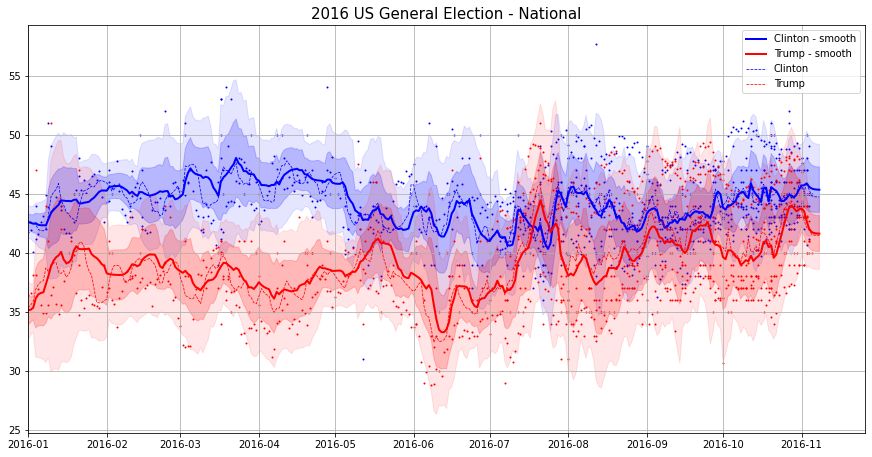

In [18]:
plt.figure(figsize=(15, 7.5))

plt.plot(national_statsSmooth_2k[['Clinton_avg']], lw=2., label='Clinton - smooth', color='blue')
plt.plot(national_statsSmooth_2k[['Trump_avg']], lw=2., label='Trump - smooth', color='red')

plt.plot(national_statsSmooth_k[['Clinton_avg']], lw=0.75, ls='--', label='Clinton', color='blue')
plt.plot(national_statsSmooth_k[['Trump_avg']], lw=0.75, ls='--', label='Trump', color='red')

candidates_color = {'Clinton':'blue', 'Trump':'red'}
for candidate in ['Clinton', 'Trump']:
    plt.scatter(polls2016.loc[polls2016['state']=='National'].index, 
                polls2016.loc[polls2016['state']=='National'][candidate], color=candidates_color[candidate], s=1.)
    plt.fill_between(national_statsSmooth_2k[candidate+'_avg'].index,
                     national_statsSmooth_2k[candidate+'_avg']+2*national_statsSmooth_2k[candidate+'_std'],
                     national_statsSmooth_2k[candidate+'_avg']-2*national_statsSmooth_2k[candidate+'_std'],
                     alpha=0.1, color=candidates_color[candidate])
    plt.fill_between(national_statsSmooth_2k[candidate+'_avg'].index,
                     national_statsSmooth_2k[candidate+'_avg']+national_statsSmooth_2k[candidate+'_std'],
                     national_statsSmooth_2k[candidate+'_avg']-national_statsSmooth_2k[candidate+'_std'],
                     alpha=0.2, color=candidates_color[candidate])

plt.title('2016 US General Election - National', fontsize=15)
plt.legend()
plt.grid()
plt.xlim(xmin=pd.to_datetime('2016-01-01'))

plt.show()

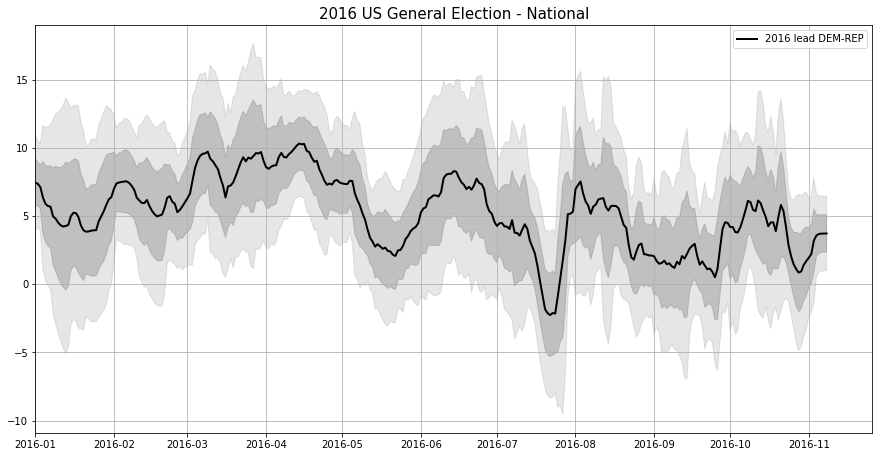

In [19]:
plt.figure(figsize=(15, 7.5))

plt.plot(national_statsSmooth_2k['diff_avg'], lw=2., label='2016 lead DEM-REP', color='black')


for candidate in ['Biden', 'Trump']:
    plt.fill_between(national_statsSmooth_2k['diff_avg'].index,
                     national_statsSmooth_2k['diff_avg']+2*national_statsSmooth_2k['diff_std'],
                     national_statsSmooth_2k['diff_avg']-2*national_statsSmooth_2k['diff_std'],
                     alpha=0.1, color='gray')
    plt.fill_between(national_statsSmooth_2k['diff_avg'].index,
                     national_statsSmooth_2k['diff_avg']+national_statsSmooth_2k['diff_std'],
                     national_statsSmooth_2k['diff_avg']-national_statsSmooth_2k['diff_std'],
                     alpha=0.2, color='gray')

plt.title('2016 US General Election - National', fontsize=15)
plt.legend()
plt.grid()
plt.xlim(xmin=pd.to_datetime('2016-01-01'))
plt.show()

In [20]:
states_statsSmooth_2k = pd.DataFrame()
for state in us.states.STATES:
    state = str(state)
    print('\r{}     '.format(state), end='', flush=True)
    try:
        tmp = get_state_statsSmooth2016_atK(polls2016, candidates=['Clinton', 'Trump'], state=state, k=16)
        tmp['state'] = state
        states_statsSmooth_2k = states_statsSmooth_2k.append(tmp)
    except:
        pass

Wyoming            

In [21]:
states_statsSmooth_k = pd.DataFrame()
for state in us.states.STATES:
    state = str(state)
    print('\r{}     '.format(state), end='', flush=True)
    try:
        tmp = get_state_statsSmooth2016_atK(polls2016, candidates=['Clinton', 'Trump'], state=state, k=8)
        tmp['state'] = state
        states_statsSmooth_k = states_statsSmooth_k.append(tmp)
    except:
        pass

Wyoming            

In [22]:
states_statsSmooth_2k.to_csv(path+'\\data\\processed\\2016_States_stats_at16.csv')
states_statsSmooth_k.to_csv(path+'\\data\\processed\\2016_States_stats_at8.csv')

In [23]:
len(states_statsSmooth_2k.state.unique())

50